In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv("data/stud.csv")

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.shape

(1000, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [16]:
print(df["gender"].unique())
print(df["race_ethnicity"].unique())
print(df["parental_level_of_education"].unique())
print(df["lunch"].unique())
print(df["test_preparation_course"].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [18]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [19]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

In [24]:
print(df["gender"].value_counts(),"\n")
print(df["lunch"].value_counts(),"\n")
print(df["parental_level_of_education"].value_counts(),"\n")
print(df["race_ethnicity"].value_counts(),"\n")
print(df["test_preparation_course"].value_counts(),"\n")

gender
female    518
male      482
Name: count, dtype: int64 

lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

test_preparation_course
none         642
completed    358
Name: count, dtype: int64 



In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [26]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [31]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
num_features = [feature for feature in df.columns if df[feature].dtype != "O"]
cat_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print("We have {} numerical features : {}".format (len(num_features), num_features))
print("We have {} categorical features: {}".format( len(cat_features), cat_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [34]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
df["Total Score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["Average Score"] = df["Total Score"]/3

In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [37]:
df["Average Score"] = df["Average Score"].astype(int)

In [44]:
reading_full = df[df["reading_score"] == 100]["Average Score"].count()
math_full = df[df["math_score"] == 100]["Average Score"].count()
writing_full = df[df["writing_score"] == 100]["Average Score"].count()

print(f"number fo students with full marks in Math {math_full}")
print(f"number fo students with full marks in Writing {writing_full}")
print(f"number fo students with full marks in Reading {reading_full}")

number fo students with full marks in Math 7
number fo students with full marks in Writing 14
number fo students with full marks in Reading 17


In [45]:
reading_less_20 = df[df["reading_score"] <= 20]["Average Score"].count()
math_less_20 = df[df["math_score"] <= 20]["Average Score"].count()
writing_less_20 = df[df["writing_score"] <= 20]["Average Score"].count()

print(f"Students with less than 20 marks in Math: {math_less_20}")
print(f"Students with less than 20 marks in Writing: {writing_less_20}")
print(f"Students with less than 20 marks in Reading: {reading_less_20}")

Students with less than 20 marks in Math: 4
Students with less than 20 marks in Writing: 3
Students with less than 20 marks in Reading: 1


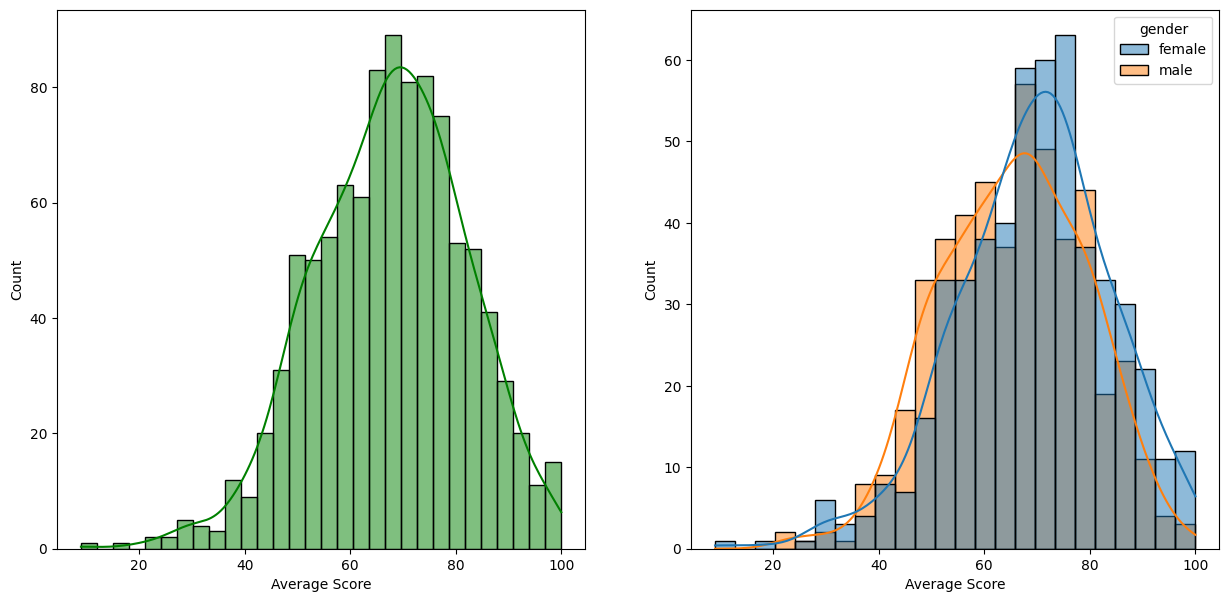

In [48]:
fig, axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df, x = "Average Score", bins = 30, kde = True, color = "g")
plt.subplot(122)
sns.histplot(data = df, x = "Average Score", kde = True, hue = "gender")
plt.show()

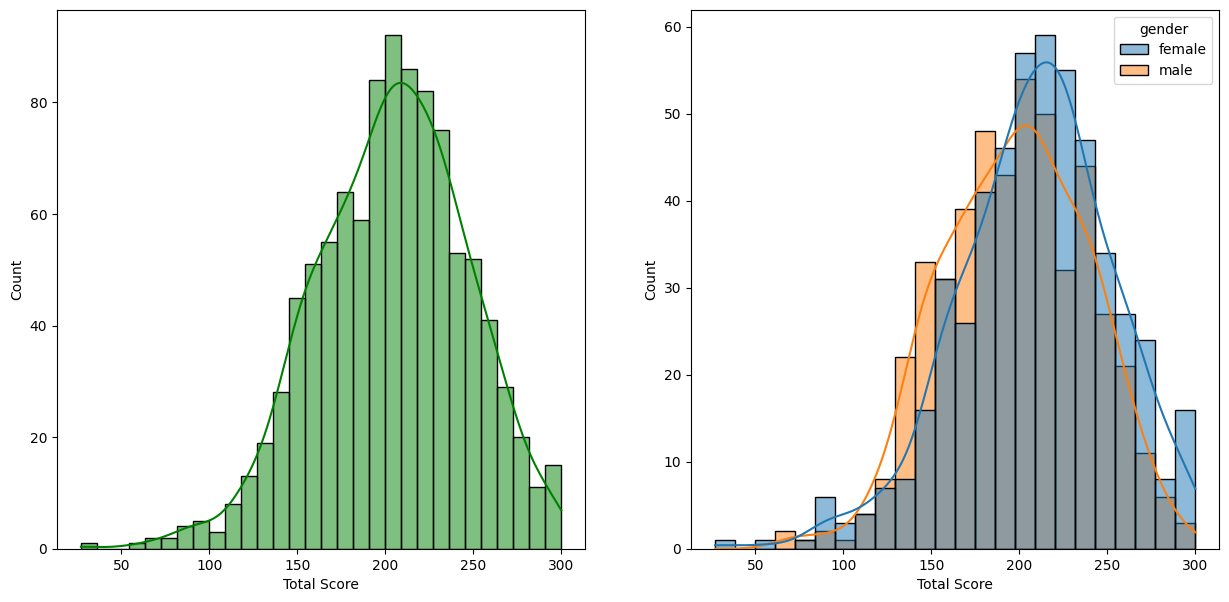

In [53]:
fig, axis = plt.subplots(1,2,figsize= (15,7))
plt.subplot(121)
sns.histplot(data = df, x ="Total Score", bins = 30, kde = True, color= "g")
plt.subplot(122)
sns.histplot(data = df, x = "Total Score", kde = True, hue = "gender")
plt.show()

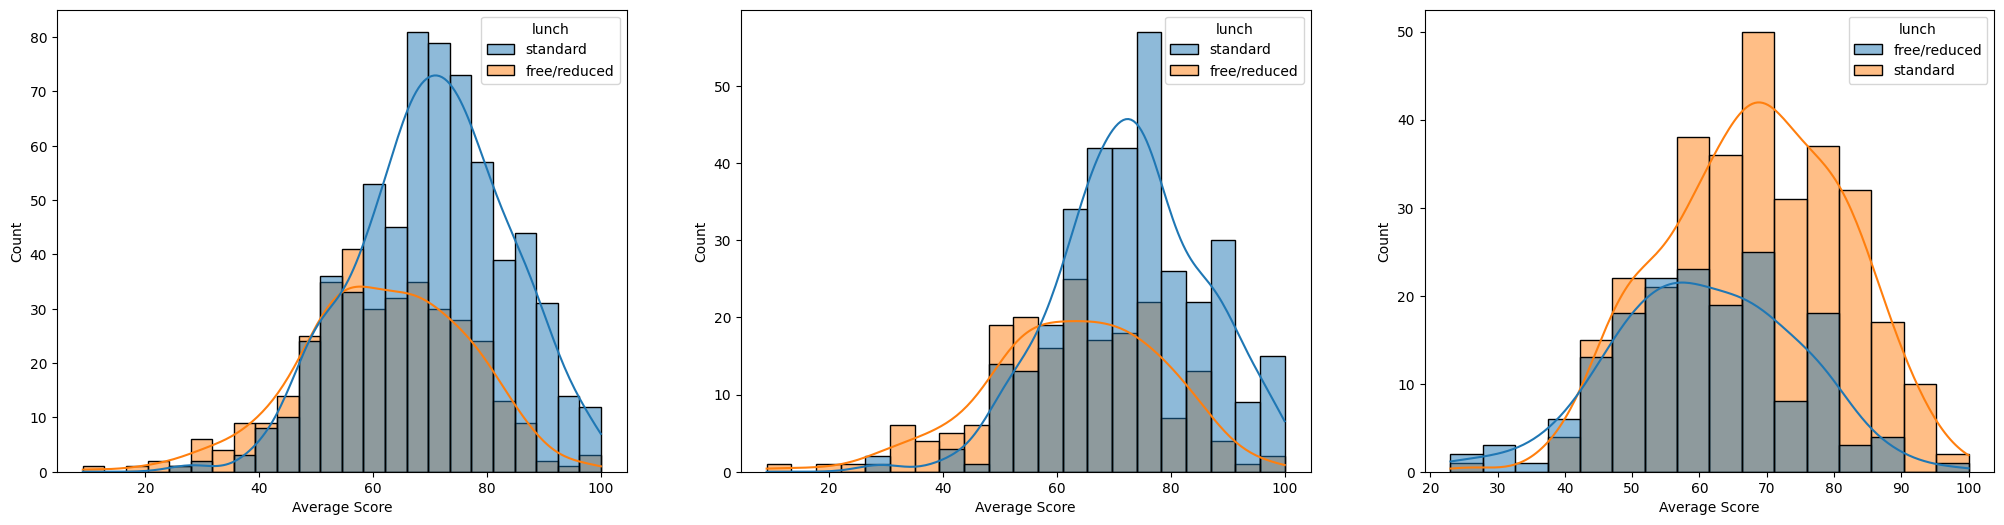

In [58]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = "Average Score", kde = True, hue = "lunch")
plt.subplot(132)
sns.histplot(data =  df[df["gender"] == "female"], x = "Average Score", kde = True, hue = "lunch")
plt.subplot(133)
sns.histplot(data = df[df.gender == "male"], x = "Average Score", kde = True, hue = "lunch")
plt.show()

<Axes: xlabel='Average Score', ylabel='Count'>

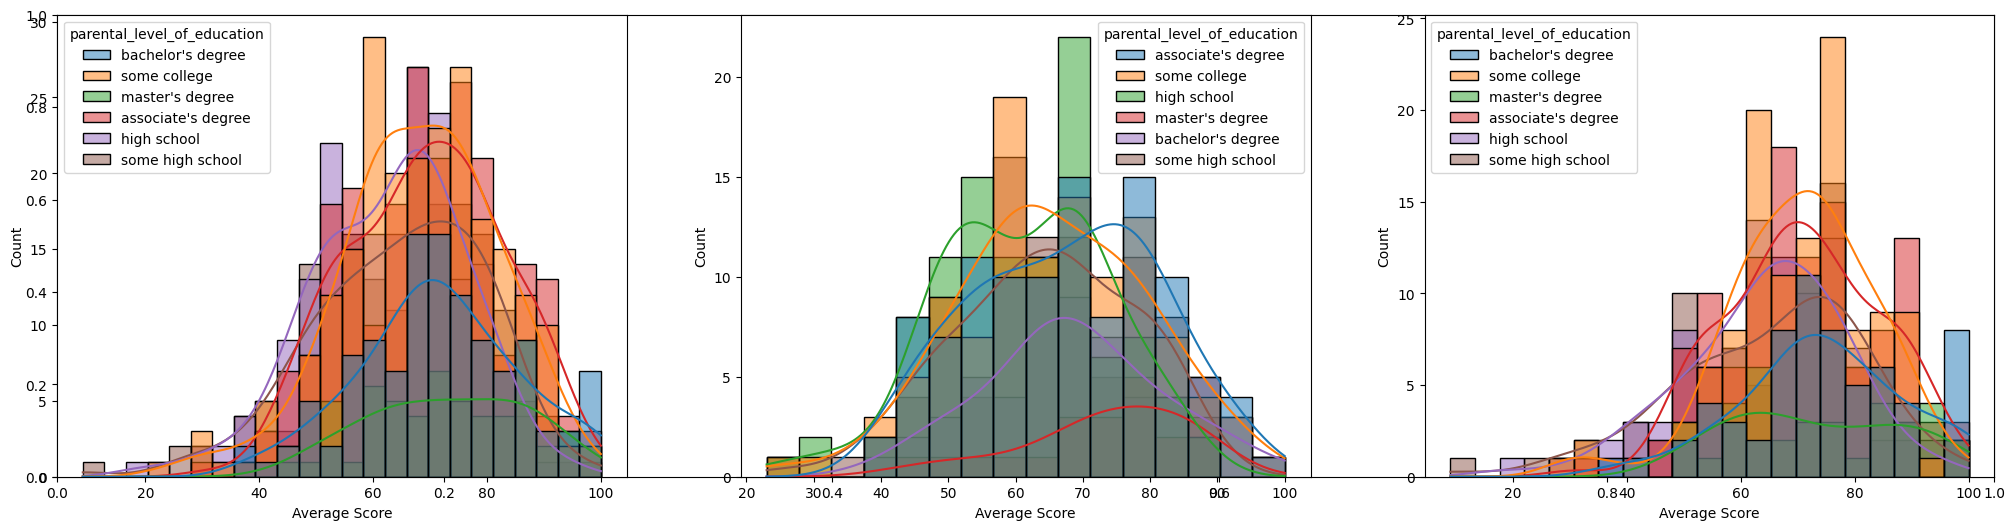

In [63]:
plt.subplots(figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = "Average Score", kde = True, hue = "parental_level_of_education")
plt.subplot(132)
sns.histplot(data = df[df.gender == "male"], x = "Average Score", kde = True, hue = "parental_level_of_education")
plt.subplot(133)
sns.histplot(data = df[df.gender == "female"], x = "Average Score", kde = True, hue = "parental_level_of_education")

<Axes: xlabel='Average Score', ylabel='Count'>

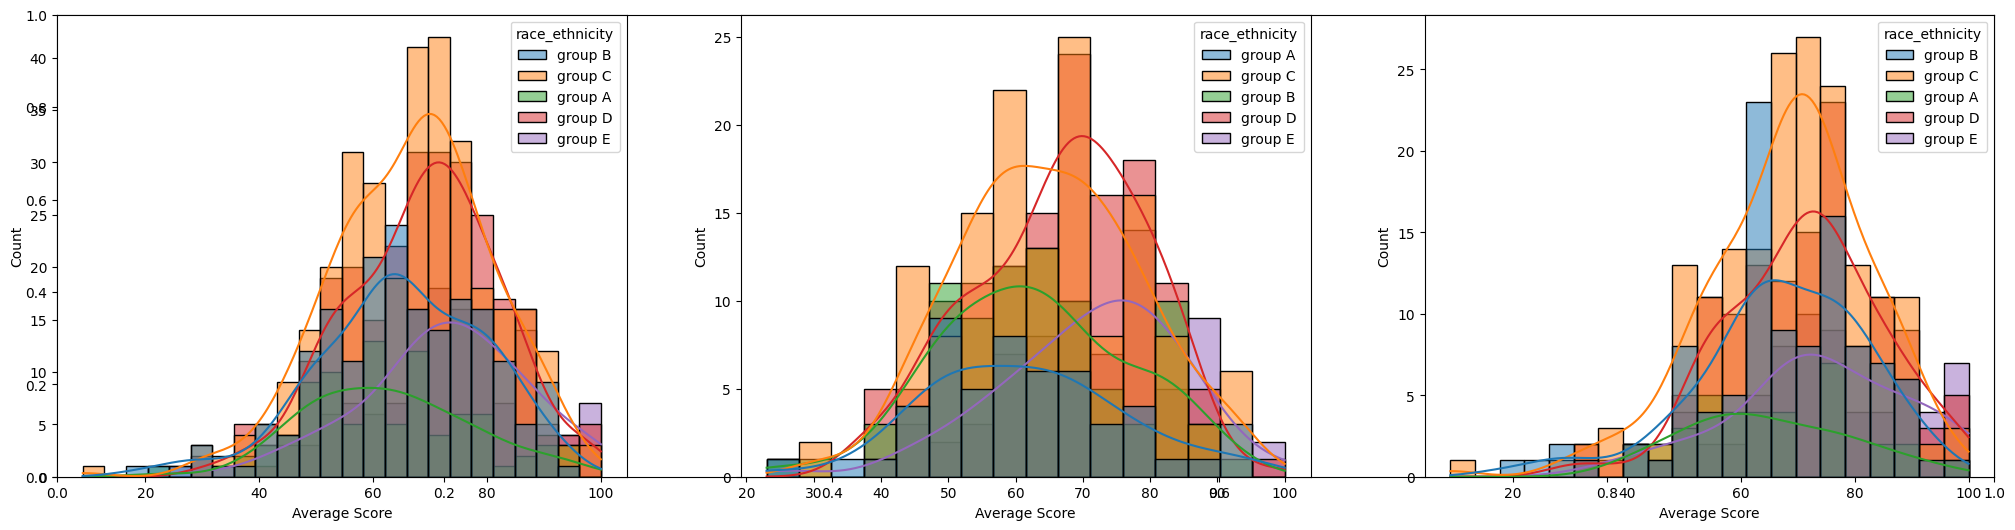

In [64]:
plt.subplots(figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = "Average Score", kde = True, hue = "race_ethnicity")
plt.subplot(132)
sns.histplot(data = df[df.gender == "male"],x = "Average Score", kde = True, hue = "race_ethnicity")
plt.subplot(133)
sns.histplot(data = df[df.gender == "female"], x = "Average Score", kde = True, hue = "race_ethnicity")

<Axes: title={'center': 'writing score'}, ylabel='writing_score'>

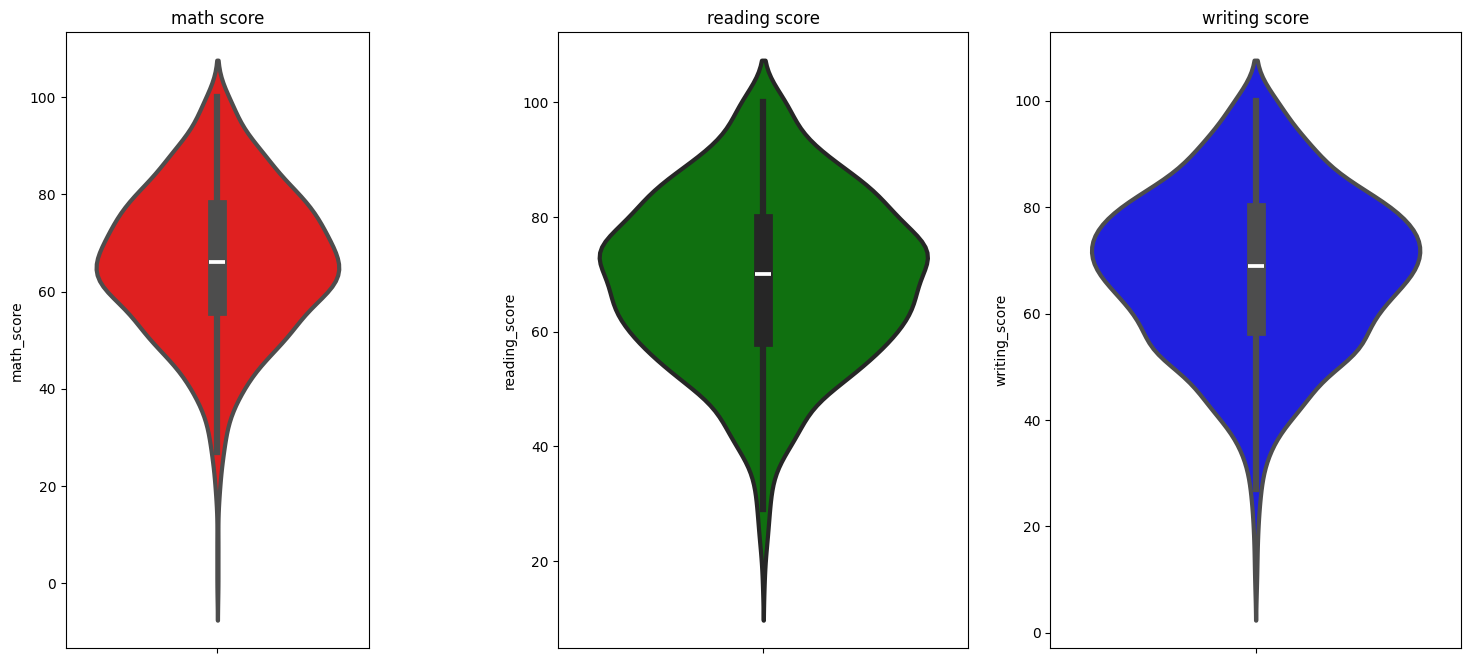

In [65]:
plt.figure(figsize = (18,8))
plt.subplot(141)
plt.title("math score")
sns.violinplot(y = "math_score", data = df, color = "r", linewidth= 3)
plt.subplot(132)
plt.title("reading score")
sns.violinplot(y = "reading_score", data = df, color = "g", linewidth= 3)
plt.subplot(133)
plt.title("writing score")
sns.violinplot(y = "writing_score", data = df, color = "b", linewidth= 3)

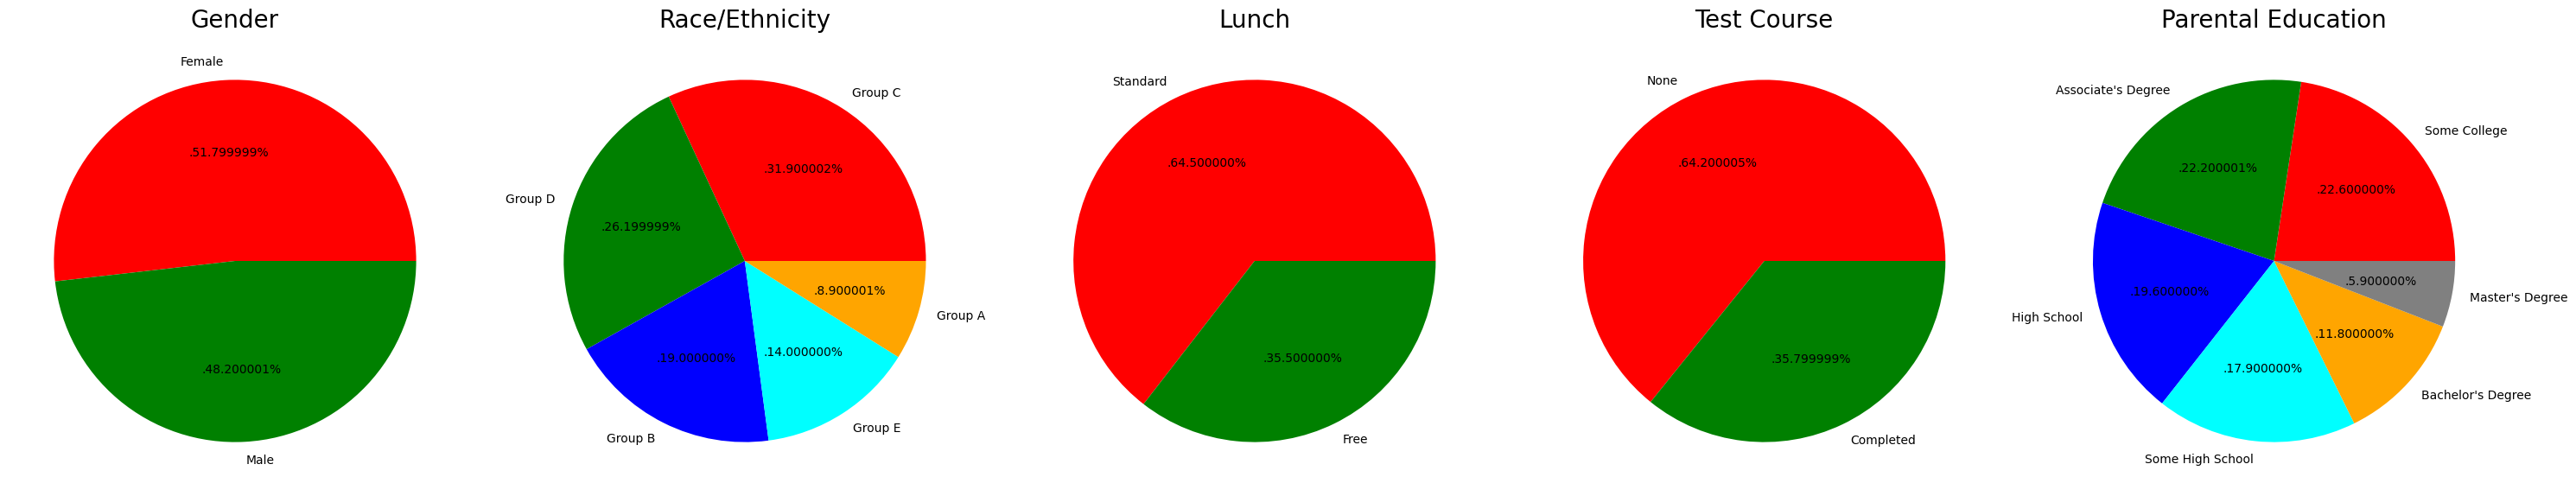

In [69]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

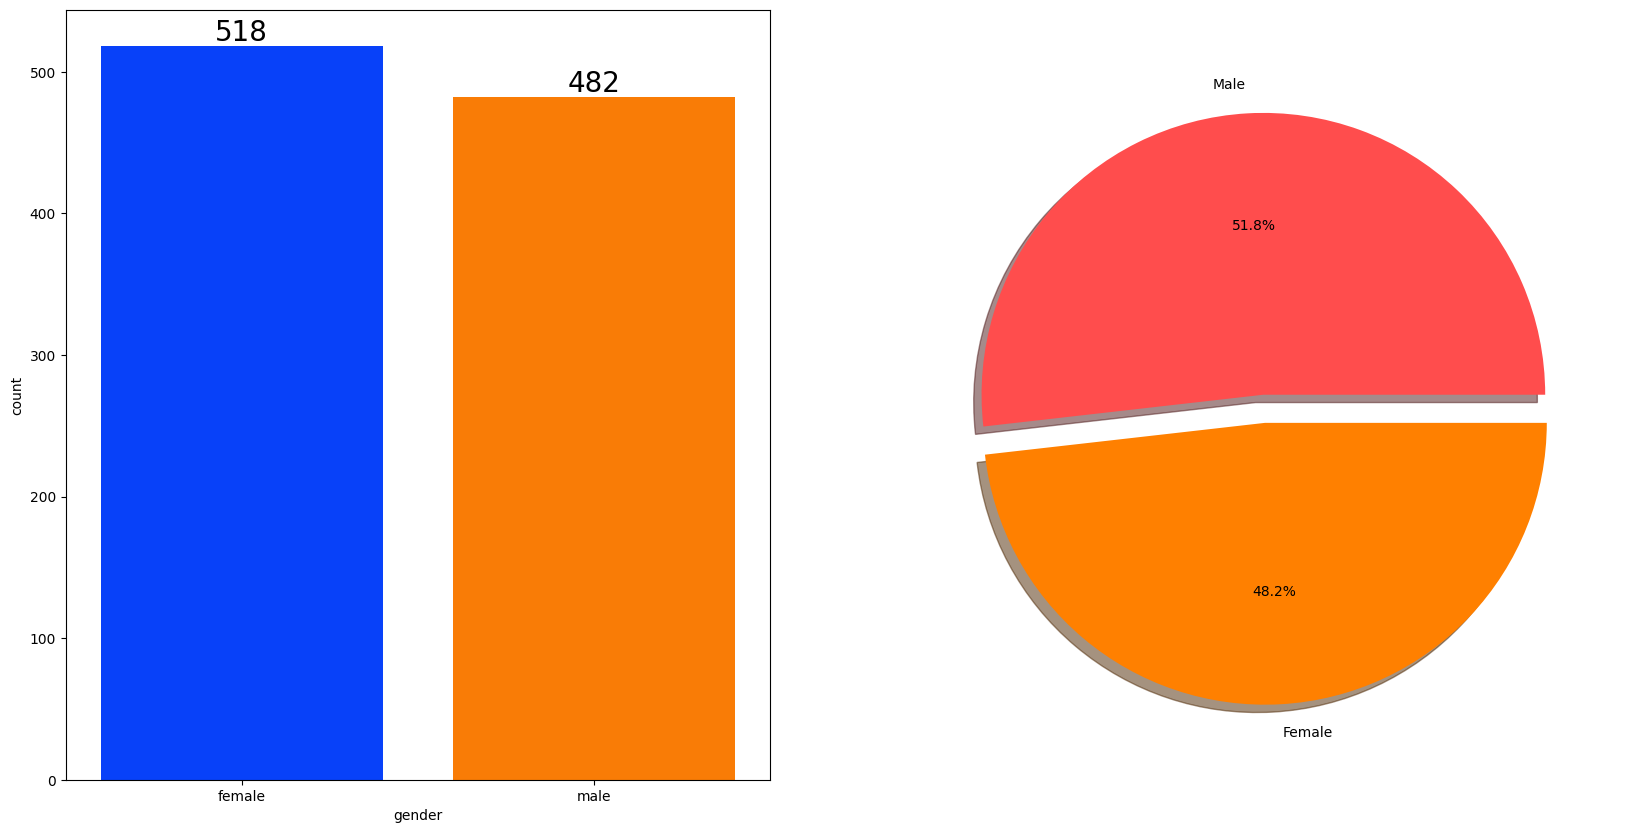

In [70]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()